In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("metadata.csv")

In [7]:
popularity = []

for idx in range(len(data)):
    
    likes = data.loc[idx,'Likes']
    if likes < 1000:
        popularity.append("low likes")
    elif 1000 <= likes < 10000:
        popularity.append("moderate likes")
    else:
        popularity.append("high likes")
        
data['popularity'] = np.array(popularity)

data.to_csv("data_classification.csv",index=False)

In [9]:
data = pd.read_csv("data_classification.csv")

In [19]:
#data["popularity"] = data["popularity"].astype('category')
#data["popularity"] = data["popularity"].cat.codes
data.head()
features = data.loc[:,['Likes','Dislikes','Views','Comments']]
labels = data.loc[:,'popularity']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestClassifier(n_estimators=64, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

plt.plot(y_pred)

[[7 0 0]
 [0 6 0]
 [0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

1.0


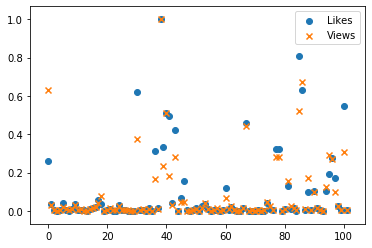

In [17]:
import matplotlib.pyplot as plt
 
df = data[['Normalized_Likes', 'Normalized_Views']]
likes = df['Normalized_Likes'].values
views = df['Normalized_Views'].values
plt.scatter([i for i in range (len(likes))], likes, marker = 'o', label='Likes')
plt.scatter([i for i in range (len(likes))], views, marker = 'x', label='Views')
plt.legend()

In [21]:
df = data[['Likes', 'Views', 'Dislikes' ,'Comments']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Likes,Views,Dislikes,Comments
Likes,1,0.92,0.65,0.78
Views,0.92,1,0.7,0.74
Dislikes,0.65,0.7,1,0.9
Comments,0.78,0.74,0.9,1
